# Two Dimensional Gaussians

Gaussians plotted in 3D!

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib import cm
from math import exp

Function for creating a single 2D surface.

In [5]:
def two_d_gaussian(points = 100,
    min_x = -4.,
    min_y = -4.,
    max_x = 4.,
    max_y = 4.,
    x0 = 0.,
    y0 = 0.,
    var_x = 1.,
    var_y = 1.
):
    xs = np.linspace(min_x, max_x, points)
    ys = np.linspace(min_y, max_y, points)
    zs = np.zeros((points, points), np.float64)

    for ix, x in enumerate(xs):
        for iy, y in enumerate(ys):
            zs[ix, iy] = exp(-((x-x0)**2/2/var_x + (y-y0)**2/2/var_y))

    return xs, ys, zs

Plot the single surface

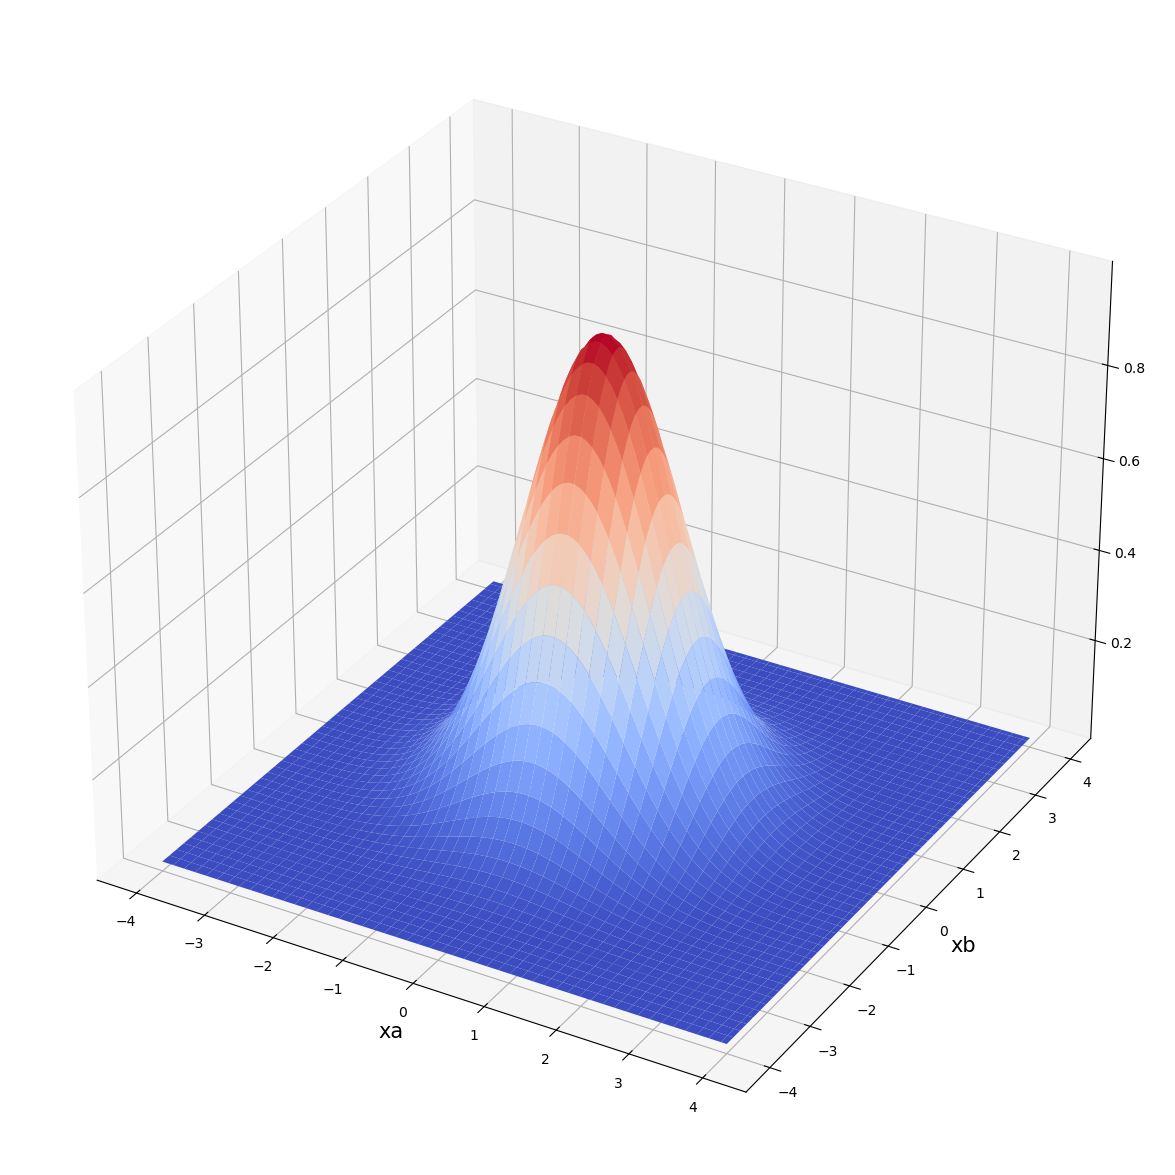

In [6]:
xs, ys, zs = two_d_gaussian()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), subplot_kw={"projection": "3d"})
xs, ys = np.meshgrid(xs, ys)
axs.set_xlabel('xa', size=15)
axs.set_ylabel('xb', size=15)
# axs.set_zlabel(f'(Ψa{na},{nb})^2', size=15, color='b')
# axs.set_title(f'na={na}, nb={nb}', size=20, color='r')
axs.plot_surface(ys, xs, zs, cmap=cm.coolwarm, linewidth=0, antialiased=True)